In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


We first load the file.

In [2]:
# news = pd.read_csv('/Users/camillecu/Downloads/KUL/text_mining/abcnews-date-text.csv')
news = pd.read_csv('abcnews-date-text.csv')
news['publish_date'] = pd.to_datetime(news['publish_date'], format='%Y%m%d')
news['year'] = news['publish_date'].dt.year
news.head()

,publish_date,headline_text,year
0,2003-02-19,aba decides against community broadcasting lic...,2003
1,2003-02-19,act fire witnesses must be aware of defamation,2003
2,2003-02-19,a g calls for infrastructure protection summit,2003
3,2003-02-19,air nz staff in aust strike for pay rise,2003
4,2003-02-19,air nz strike to affect australian travellers,2003


In [3]:
news.shape

(1244184, 3)

Perform the following tasks:
1. Apply the Latent Semantic Analysis and Latent Dirichlet Allocation technique to study the topic focus of ABC’s news headlines. Characterize them by exploring the most frequent words in each topic.


Preprocess the data:
Remove stopwords, punctuation, and special characters
Convert text to lowercase
Tokenize the headlines
Apply lemmatization or stemming

In [4]:
import nltk
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # For multilingual WordNet
nltk.download('stopwords')  # For the stopwords list
nltk.download('punkt')  # For word tokenization


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhangnaichuan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/zhangnaichuan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhangnaichuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhangnaichuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

A new column is created to store the processed text (after removing stop words, special characters, lemmatization, and convert to lower case )

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply the preprocess_text function to each row in the 'headline_text' column
news['processed_text'] = news['headline_text'].apply(preprocess_text)


- By creating a document-term matrix using TF-IDF vectorization, we transform raw text into a structured, numerical format suitable for machine learning algorithmt and captures the semantic importance of words, enabling more accurate and meaningful analysis. 
- By setting max_features=5000, which limits the number of features (unique words) to the top 5000 most frequent terms in the corpus, we reduce the dimensionality of the feature space and can potentially improve the performance of subsequent machine learning models.



In [6]:
# Create TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(news['processed_text'])
tfidf_matrix.shape


(1244184, 5000)

Now we trained LSA and LDA model with 8 topics using tfidf_matrix.

In [7]:
# Apply LSA
n_topics = 8
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Create a function to print the top 10 words of each topic from the two models

In [8]:
# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

In [9]:
# Print LDA topics
print("\nLDA Topics:")
print_top_words(lda_model, vectorizer.get_feature_names_out())


LDA Topics:
Topic 1: day, test, australia, world, win, final, cup, india, england, festival
Topic 2: year, killed, kill, dead, police, attack, man, sydney, iraq, one
Topic 3: coast, gold, police, ban, search, driver, shark, beach, game, afl
Topic 4: interview, say, talk, trump, pm, election, speaks, president, call, new
Topic 5: market, rural, news, price, abc, country, share, record, weather, rate
Topic 6: court, child, accused, sex, trial, charge, face, man, abuse, hospital
Topic 7: man, police, crash, fire, death, woman, found, charged, car, missing
Topic 8: plan, council, govt, change, new, water, government, funding, call, group


In [10]:
# Print LSA topics
print("LSA Topics:")
print_top_words(lsa_model, vectorizer.get_feature_names_out())

LSA Topics:
Topic 1: interview, police, man, extended, new, charged, court, murder, crash, michael
Topic 2: police, man, charged, court, new, murder, crash, death, woman, say
Topic 3: man, charged, murder, police, court, dy, jailed, charge, stabbing, missing
Topic 4: police, probe, investigate, officer, search, hunt, arrest, missing, seek, driver
Topic 5: new, police, zealand, man, year, case, york, open, charged, home
Topic 6: fire, crash, australia, win, car, dy, rural, australian, day, house
Topic 7: australia, say, abc, win, news, day, court, world, rural, face
Topic 8: rural, news, national, abc, market, nsw, council, business, court, police


We want to create a topic name for each topics. If we only used the most frequent word in a topuc as the topic name, the single word fail to represent the whole topic.
Therefore, I decide to manually pick topic name for each topics. 

In [11]:
def get_topic_names(model, feature_names, n_top_words=1):
    topic_names = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_names[topic_idx] = top_words[0].capitalize()  # Use the top word as the topic name
    return topic_names

lsa_topic_names = get_topic_names(lsa_model, vectorizer.get_feature_names_out())
lda_topic_names = get_topic_names(lda_model, vectorizer.get_feature_names_out())

print("LSA Topic Names:", lsa_topic_names)
print("LDA Topic Names:", lda_topic_names)


LSA Topic Names: {0: 'Interview', 1: 'Police', 2: 'Man', 3: 'Police', 4: 'New', 5: 'Fire', 6: 'Australia', 7: 'Rural'}
LDA Topic Names: {0: 'Day', 1: 'Year', 2: 'Coast', 3: 'Interview', 4: 'Market', 5: 'Court', 6: 'Man', 7: 'Plan'}


Create a function to print the top 10 words of each topic from the two models while using the custom topic name.

In [12]:
def print_top_words(model, feature_names, topic_labels, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_name = topic_labels.get(topic_idx + 1, f"Topic {topic_idx + 1}")
        print(f"{topic_name}: {', '.join(top_words)}")



Print each topic with custom topic name.

In [13]:
# Define topic labels
topic_labels_lsa = {
    1: "Crime & Justice",
    2: "Law Enforcement & Crime Reports",
    3: "Homicide & Missing Persons",
    4: "Investigations & Law Enforcement",
    5: "Legal Cases & New Zealand",
    6: "Government & Legal Affairs",
    7: "Accidents & Australian News",
    8: "Courts & Public Figures"
}

# Print LSA topics with custom names
print("LSA Topics:")
print_top_words(lsa_model, vectorizer.get_feature_names_out(), topic_labels_lsa)

LSA Topics:
Crime & Justice: interview, police, man, extended, new, charged, court, murder, crash, michael
Law Enforcement & Crime Reports: police, man, charged, court, new, murder, crash, death, woman, say
Homicide & Missing Persons: man, charged, murder, police, court, dy, jailed, charge, stabbing, missing
Investigations & Law Enforcement: police, probe, investigate, officer, search, hunt, arrest, missing, seek, driver
Legal Cases & New Zealand: new, police, zealand, man, year, case, york, open, charged, home
Government & Legal Affairs: fire, crash, australia, win, car, dy, rural, australian, day, house
Accidents & Australian News: australia, say, abc, win, news, day, court, world, rural, face
Courts & Public Figures: rural, news, national, abc, market, nsw, council, business, court, police


In [14]:
topic_labels_lda = {
    1: "Sports & International Events",
    2: "Crime, Violence & Conflict",
    3: "Coast & Environmental Issues",
    4: "Politics & Elections",
    5: "Economy & Rural Affairs",
    6: "Legal & Child Protection Issues",
    7: "Accidents & Public Safety",
    8: "Government Policies & Public Planning"
}


# Print LDA topics
print("\nLDA Topics:")
print_top_words(lda_model, vectorizer.get_feature_names_out(), topic_labels_lda)


LDA Topics:
Sports & International Events: day, test, australia, world, win, final, cup, india, england, festival
Crime, Violence & Conflict: year, killed, kill, dead, police, attack, man, sydney, iraq, one
Coast & Environmental Issues: coast, gold, police, ban, search, driver, shark, beach, game, afl
Politics & Elections: interview, say, talk, trump, pm, election, speaks, president, call, new
Economy & Rural Affairs: market, rural, news, price, abc, country, share, record, weather, rate
Legal & Child Protection Issues: court, child, accused, sex, trial, charge, face, man, abuse, hospital
Accidents & Public Safety: man, police, crash, fire, death, woman, found, charged, car, missing
Government Policies & Public Planning: plan, council, govt, change, new, water, government, funding, call, group


Question 2: How do these topics evolve through time in the ABC news headlines?

In [15]:
lda_topics = []
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda_model.components_):
    top_terms = [terms[i] for i in topic.argsort()[-10:]]
    lda_topics.append(top_terms)
    print(f"Topic {topic_labels_lda[i + 1]}: {top_terms}")

Topic Sports & International Events: ['festival', 'england', 'india', 'cup', 'final', 'win', 'world', 'australia', 'test', 'day']
Topic Crime, Violence & Conflict: ['one', 'iraq', 'sydney', 'man', 'attack', 'police', 'dead', 'kill', 'killed', 'year']
Topic Coast & Environmental Issues: ['afl', 'game', 'beach', 'shark', 'driver', 'search', 'ban', 'police', 'gold', 'coast']
Topic Politics & Elections: ['new', 'call', 'president', 'speaks', 'election', 'pm', 'trump', 'talk', 'say', 'interview']
Topic Economy & Rural Affairs: ['rate', 'weather', 'record', 'share', 'country', 'abc', 'price', 'news', 'rural', 'market']
Topic Legal & Child Protection Issues: ['hospital', 'abuse', 'man', 'face', 'charge', 'trial', 'sex', 'accused', 'child', 'court']
Topic Accidents & Public Safety: ['missing', 'car', 'charged', 'found', 'woman', 'death', 'fire', 'crash', 'police', 'man']
Topic Government Policies & Public Planning: ['group', 'call', 'funding', 'government', 'water', 'new', 'change', 'govt', 'c

In [16]:
terms = vectorizer.get_feature_names_out()
lsa_topics = []
for i, comp in enumerate(lsa_model.components_):
    top_terms = [terms[i] for i in comp.argsort()[-10:]]
    lsa_topics.append(top_terms)
    print(f"Topic {topic_labels_lsa[i+1]}: {top_terms}")

Topic Crime & Justice: ['michael', 'crash', 'murder', 'court', 'charged', 'new', 'extended', 'man', 'police', 'interview']
Topic Law Enforcement & Crime Reports: ['say', 'woman', 'death', 'crash', 'murder', 'new', 'court', 'charged', 'man', 'police']
Topic Homicide & Missing Persons: ['missing', 'stabbing', 'charge', 'jailed', 'dy', 'court', 'police', 'murder', 'charged', 'man']
Topic Investigations & Law Enforcement: ['driver', 'seek', 'missing', 'arrest', 'hunt', 'search', 'officer', 'investigate', 'probe', 'police']
Topic Legal Cases & New Zealand: ['home', 'charged', 'open', 'york', 'case', 'year', 'man', 'zealand', 'police', 'new']
Topic Government & Legal Affairs: ['house', 'day', 'australian', 'rural', 'dy', 'car', 'win', 'australia', 'crash', 'fire']
Topic Accidents & Australian News: ['face', 'rural', 'world', 'court', 'day', 'news', 'win', 'abc', 'say', 'australia']
Topic Courts & Public Figures: ['police', 'court', 'business', 'council', 'nsw', 'market', 'abc', 'national', '

In [17]:
news["lsa_topic"] = np.argmax(lsa_topic_matrix, axis=1)
news['lda_topic'] = lda_topic_matrix.argmax(axis=1)

In [18]:
# Group by year to analyze topic evolution
lsa_trends = news.groupby('year')['lsa_topic'].value_counts().unstack(fill_value=0)
lda_trends = news.groupby('year')['lda_topic'].value_counts().unstack(fill_value=0)

In [19]:
lsa_trends.columns = list(topic_labels_lsa.values())
lda_trends.columns = list(topic_labels_lda.values())
lsa_trends

,Crime & Justice,Law Enforcement & Crime Reports,Homicide & Missing Persons,Investigations & Law Enforcement,Legal Cases & New Zealand,Government & Legal Affairs,Accidents & Australian News,Courts & Public Figures
year,,,,,,,,
2003,554,43814,26,2115,1758,7549,5019,3162
2004,605,50483,30,2537,2045,8429,4982,3563
2005,780,50854,20,2657,2078,8011,4822,3902
2006,675,46363,19,2193,1696,7536,4442,3977
2007,1129,53438,37,2930,1971,8207,4733,4729
2008,1857,54640,40,2778,2029,8986,5061,4600
2009,3286,50994,53,2417,1733,9242,4760,3959
2010,4348,49100,52,2170,1649,8866,5094,3652
2011,3853,51056,54,1945,1775,9103,4919,5073


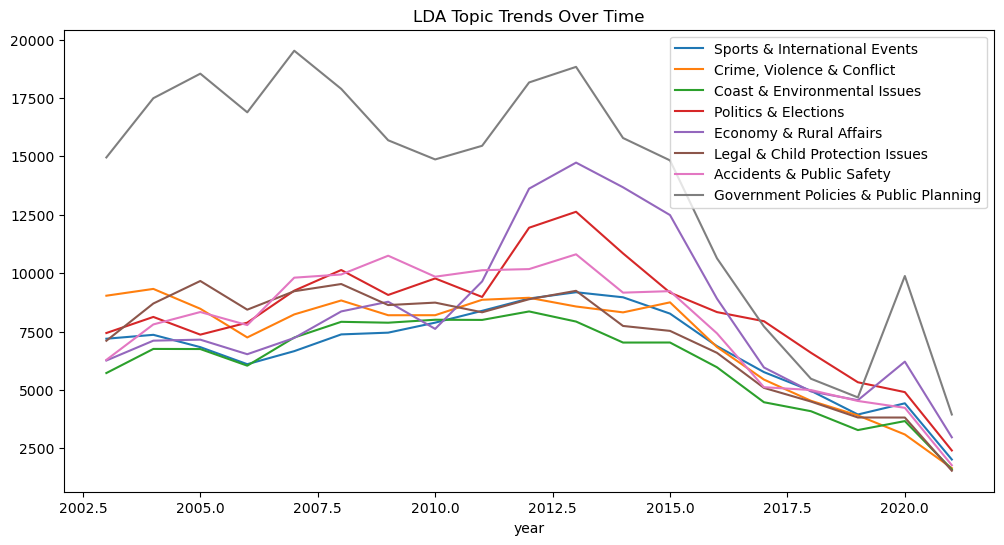

In [20]:
# Plot trends
lda_trends.plot(title="LDA Topic Trends Over Time", figsize=(12, 6))
plt.show()

This plot shows that "government policies and public planning" is the hottest topic among all the topics. Before 2013, this topic is far popular than other topics. After 2013, people started to focus on other topics also. There is a similar trend among all the topics that in 2013 and 2020, all the topics have a peak. After 2011, "economy and rural affairs" becomes the second-hottest topic.

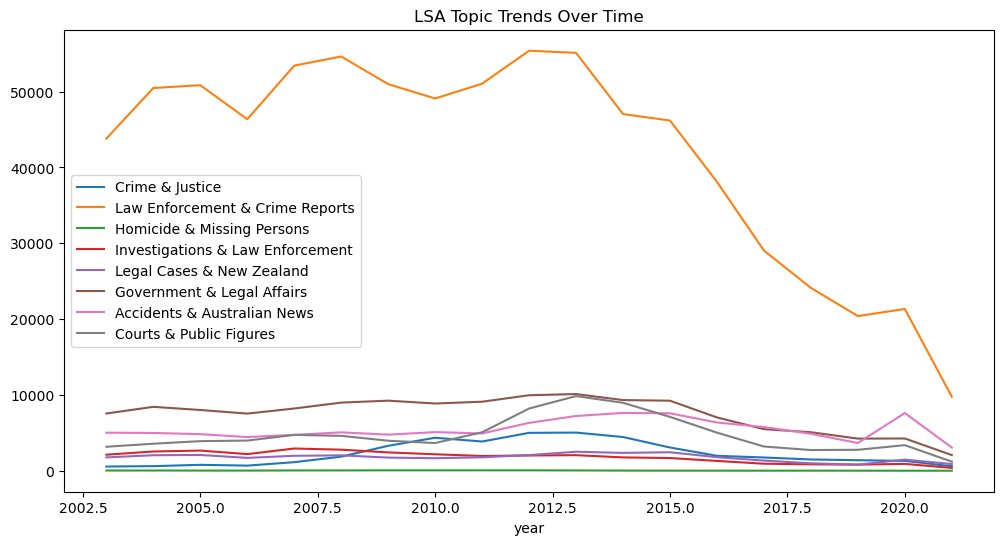

In [21]:
lsa_trends.plot(title="LSA Topic Trends Over Time", figsize=(12, 6))
plt.show()

This figure shows "law enforcement and crime reports" is far more popular than other topics. And there is a decrease after 2013. Both model indicates that the social safety improves after 2013. We want to investigate other topics, so that we delete "law enforcement and crime reports" to draw a new plot.

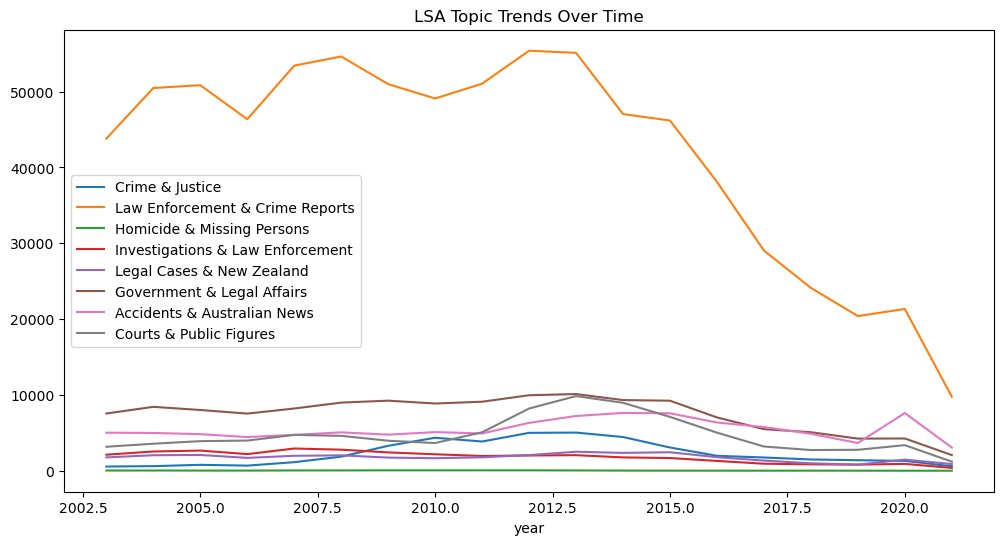

In [22]:
# lsa_trends.drop(columns="Law Enforcement & Crime Reports", inplace=True)
lsa_trends.plot(title="LSA Topic Trends Over Time", figsize=(12, 6))
plt.show()

This figure shows the other topics from LSA model. "Courts and Public Figures" shows an obvious peak around 2013. Another obvious peak is "accidents and Austrilian News" around 2020, indicating that a lot of accidents happened on this year.

Below we plot the world cloud of every topic of both models. Each figure shows the weights of keywords in every topic, which also helps us to define the topic name of each topic group.

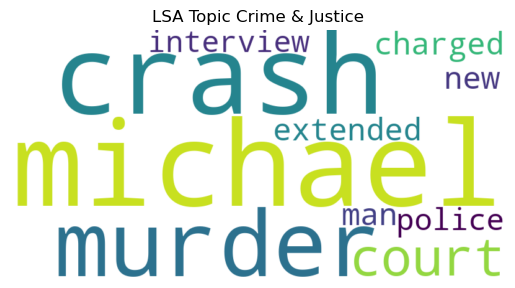

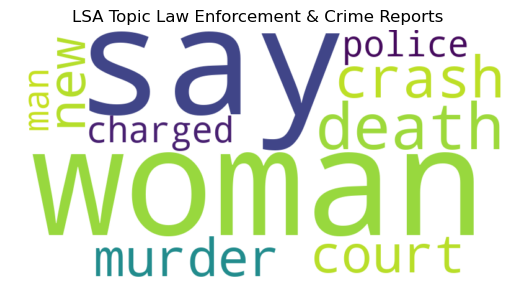

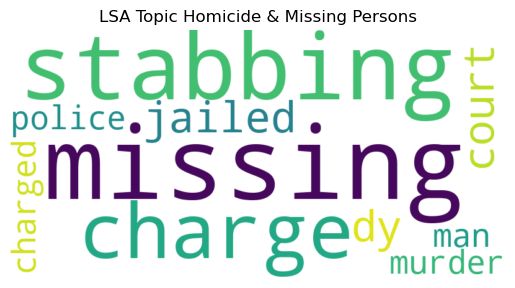

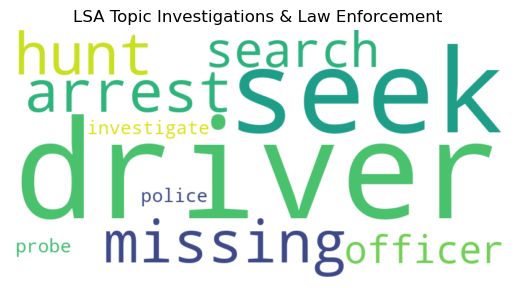

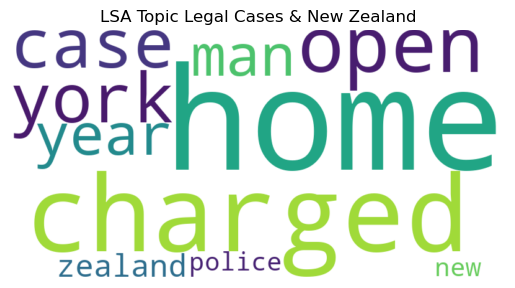

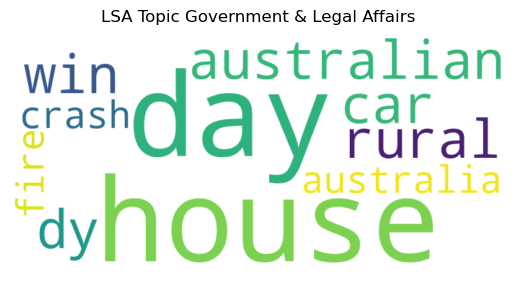

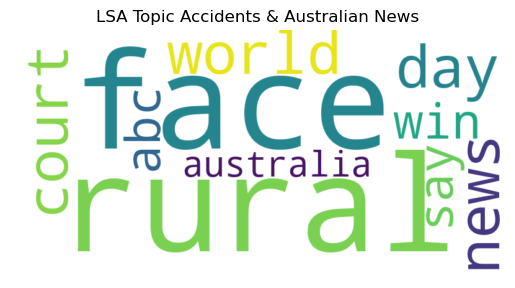

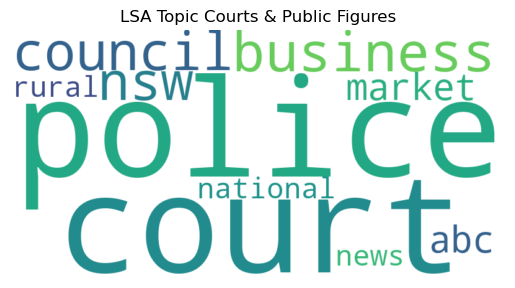

In [23]:
# Word clouds for LSA topics
for i, terms in enumerate(lsa_topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(terms))
    plt.figure()
    plt.title(f"LSA Topic {topic_labels_lsa[i+1]}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

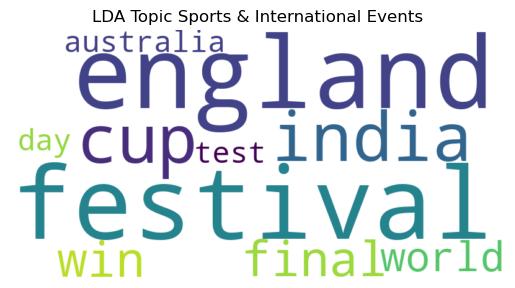

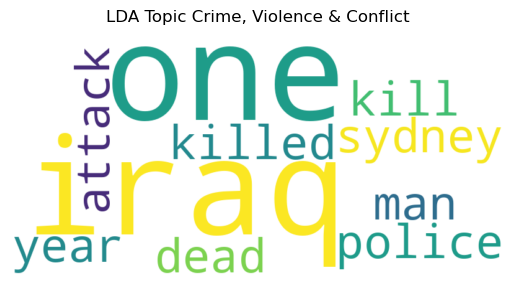

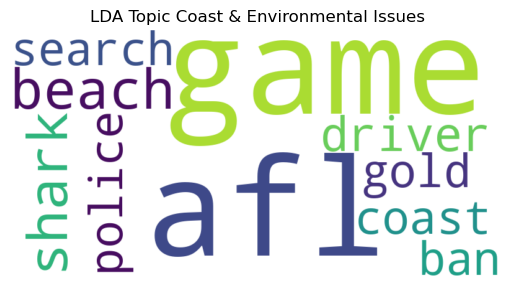

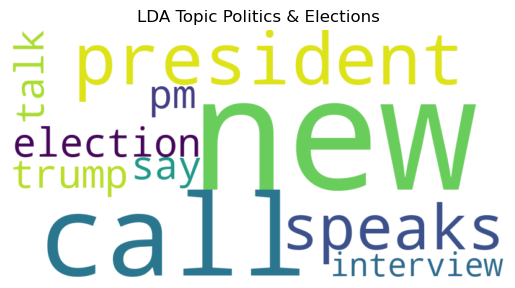

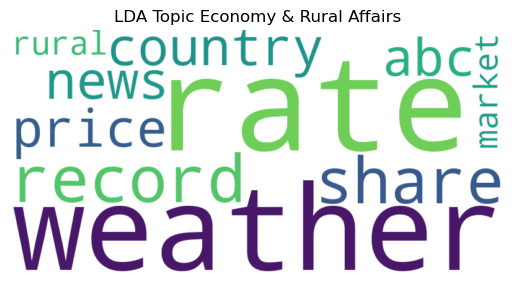

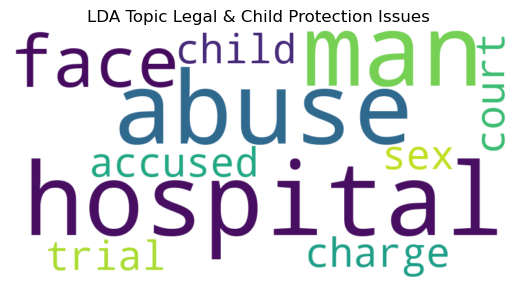

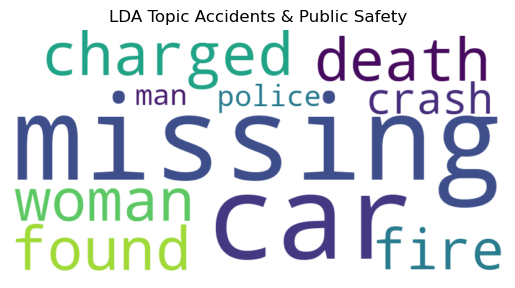

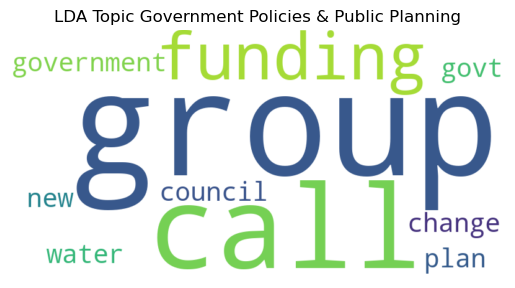

In [24]:
# Word clouds for LDA topics
for i, terms in enumerate(lda_topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(terms))
    plt.figure()
    plt.title(f"LDA Topic {topic_labels_lda[i+1]}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()